Task3: Implement and understand single and multiple regression

In [ ]:
# Import and preprcoess data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load the dataset 
df = pd.read_csv(r"Housing.csv")
df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Split data into train-test sets 

X = df[['price']]  # Independent variable
y = df['area']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# fit a linear regression model 

model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)


In [6]:
# evaluate the model (MAE,MSE,R2)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📌 Model Evaluation Metrics")
print("MAE (Mean Absolute Error):", mae)
print("MSE (Mean Squared Error):", mse)
print("R² Score:", r2)


📌 Model Evaluation Metrics
MAE (Mean Absolute Error): 1341.5115869796875
MSE (Mean Squared Error): 2935124.1250945292
R² Score: 0.2863227465807431


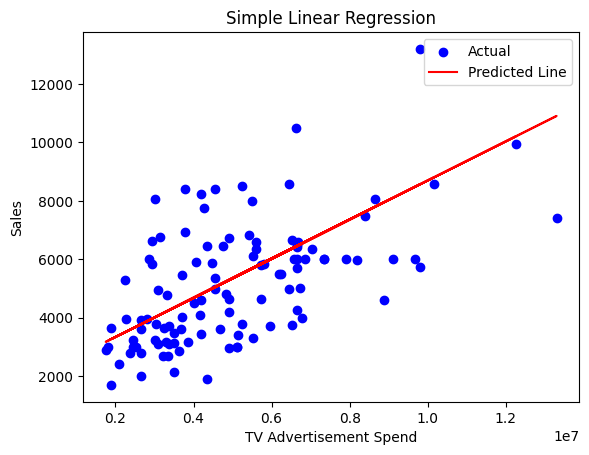

Intercept (β0): 2003.8188952623354
Slope (β1): 0.0006693524423072232


In [7]:
# plot the regression line and intrepret coefficients 

# Plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.xlabel('TV Advertisement Spend')
plt.ylabel('Sales')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# Coefficients
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])


In [10]:
# for multiple regression (bedrooms,bathrooms,stories) 

X_multi = df[['bedrooms', 'bathrooms', 'stories']]
y_multi = df['price']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

y_pred_multi = model_multi.predict(X_test_m)

# Evaluation
print("\n📌 Multiple Regression Evaluation")
print("MAE:", mean_absolute_error(y_test_m, y_pred_multi))
print("MSE:", mean_squared_error(y_test_m, y_pred_multi))
print("R² Score:", r2_score(y_test_m, y_pred_multi))

# Coefficients
print("Intercept:", model_multi.intercept_)
print("Coefficients:", model_multi.coef_)
print("Feature Names:", X_multi.columns.tolist())



📌 Multiple Regression Evaluation
MAE: 1362683.3582451253
MSE: 3430817314195.6533
R² Score: 0.321244508043685
Intercept: 1129311.551589068
Coefficients: [ 275468.56943038 1528694.6601332   463928.18088603]
Feature Names: ['bedrooms', 'bathrooms', 'stories']
